# Samples from Dirichlet distribution

The Dirichlet distribution is a distribution over distributions!
In Bayesian methods, it is used as a prior for categorical and multinomial distributions. The Dirichlet distribution appears in natural language processing in [Latent Dirichlet allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) and [Bayesian HMMs](http://www.aclweb.org/anthology/P07-1094).

In this quick post, I'll sample from `pymc3`'s `Dirichlet` distribution using different values of concentration parameters and plot what the corresponding distributions. 

For more detailed information:
 - [Wikipedia article](https://en.wikipedia.org/wiki/Dirichlet_distribution).
 - [This document](http://mayagupta.org/publications/FrigyikKapilaGuptaIntroToDirichlet.pdf) seems to give a good background on the mathematics.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pymc3 as pm

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# helper functions you can skip over :D
def hide_ticks(plot):
    plot.axes.get_xaxis().set_visible(False)
    plot.axes.get_yaxis().set_visible(False)

SAVE = True
def maybe_save_plot(filename):
    if SAVE:
        plt.tight_layout()
        plt.savefig('images/' + filename, bbox_inches="tight")

Eh, a story might help explain. I'm randomly choosing one of three types of cookies, and I might want to weight some cookies higher than others. I don't know how exactly they should be weighted, but I have an idea of how I want them to be weighted. For example, it might be one of:

 - One type of cookie (I don't know which) is more frequent than the others. 
 - Each type of cookie is equally likely.
 - One particular cookie type is weighted higher than the others.
 - I have no idea. 

By adjusting the concentration parameters `a` in the `pymc3.Dirichlet` distribution, I can add this information to my prior.

To try this out, I'll sample a few examples from four Dirichlet distributions with different concentration parameters. 

Heads up, in Bayesian statistics, the prior involves the distribution that these samples come from, not the samples individually. If you saw my post about [Bayesian linear regression](2018-01-03-bayesian-linreg.ipynb), each of these samples is like a single line from the samples from the prior. The real prior distribution includes all of them!

In [3]:
# how many categories to sample from
values = 3

with pm.Model() as model:
    # borrowing these numbers from http://mayagupta.org/publications/FrigyikKapilaGuptaIntroToDirichlet.pdf
    pm.Dirichlet('dir_tenth', a=0.1 * np.ones(values))
    pm.Dirichlet('dir_one', a=1 * np.ones(values))
    pm.Dirichlet('dir_ten', a=10 * np.ones(values))
    pm.Dirichlet('dir_skewed', a=np.array([2, 5, 15]))
    
    # just sample a small number.
    trace = pm.sample(20, nuts_kwargs=dict(target_accept=.99))

Only 20 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [dir_skewed_stickbreaking__, dir_ten_stickbreaking__, dir_one_stickbreaking__, dir_tenth_stickbreaking__]
100%|██████████| 520/520 [00:09<00:00, 53.02it/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.939145954445564, but should be close to 0.99. Try to increase the number of tuning steps.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


For each of the four distribution, I'll grab ten samples. These samples are another distribution! I asked for three numbers, so the samples are three numbers that sum to one.
I'll plot these ten sampled distributions as a stacked bar plot. They should all sum to one. They will also reflect the concentration parameter values:

 - `dir_tenth`: One type of cookie (I don't know which) is more frequent than the others. 
 - `dir_one`: I have no idea. The *probabilities* are chosen from a uniform distribution.
 - `dir_ten`: Each type of cookie is equally likely.
 - `dir_skewed`: One particular cookie type is weighted higher than the others.

These can be used as the values of a discrete probability distribution, for example as the probabilities in a multinomial distribution.

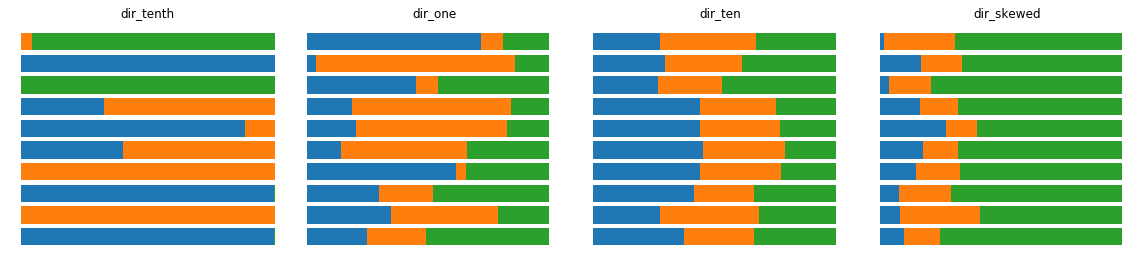

In [4]:
sample_count = 10

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

names = ['dir_tenth', 'dir_one', 'dir_ten', 'dir_skewed']

locations = np.arange(sample_count)
for plot_i, name in enumerate(names):
    examples = trace[name][:sample_count]
    left_offset = np.zeros(sample_count)
    for i in range(values):
        vals = examples[:, i]
        axs[plot_i].barh(
            locations,
            vals,
            left=left_offset,
        )
        left_offset += vals
    axs[plot_i].set_title(name)
    axs[plot_i].axis('off')
    
maybe_save_plot('2018-05-26-dist')    
plt.show()